In [4]:
import nltk
import sys
from collections import Counter
import pandas as pd
from os import listdir
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [5]:
folder = 'training-monolingual.tokenized.shuffled/'

# Part 1 : Counting Words and adding one simple transformation

In [45]:
def count_words(folder):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            tokens = corpus.split(' ')
            wc += Counter(tokens) # word_tokenize(object)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, wc, times, types

In [46]:
total_time, wc, times, types = count_words(folder)

100%|██████████| 99/99 [03:12<00:00,  1.94s/it]

Total time : --- 192.07884645462036 seconds ---


In [47]:
df = pd.DataFrame.from_dict(wc, orient='index', columns = ['frequency'])
print(df)


                        frequency
The                        850976
U.S.                       604446
Centers                      8790
for                       6508821
Disease                      8708
...                           ...
.\nCarefully-regulated          1
LabNearly                       1
benefitsor                      1
Ndoungou                        1
un-prepossessing                1

[2851884 rows x 1 columns]


In [48]:
total_words = df['frequency'].sum()
total_types = len(df)

In [49]:
# number of tokens
print("Number of tokens: ", total_words)
# vocab size: len(wc) = = len(df)
vocab_size = len(wc)
print("Vocab size: ", len(wc))

Number of tokens:  738347955
Vocab size:  2851884


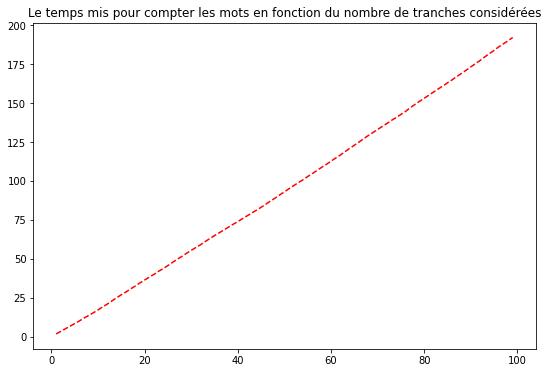

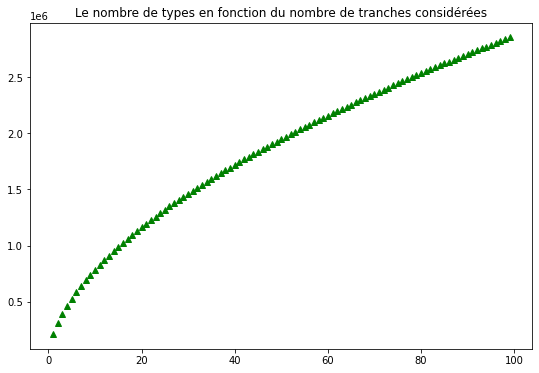

In [50]:
tranches = list(range(1,100))
plt.figure(figsize=(9,6))
plt.plot(tranches, times,'r--')
plt.title("Le temps mis pour compter les mots en fonction du nombre de tranches considérées")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(tranches, types , 'g^')
plt.title("Le nombre de types en fonction du nombre de tranches considérées")
plt.show()

## Transformation 1 : Lowercase

In [51]:
def count_words_lower(folder):
    files = listdir(folder)
    wc = Counter()
    times_t1 = []
    types_t1 = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read().lower()
            tokens = corpus.split(' ')
            wc += Counter(tokens)
            times_t1.append(time.time() - start_time)
            types_t1.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, wc, times_t1, types_t1


In [52]:
total_time_after_lower, wc_lower = count_words_lower(folder)
vocab_size_lower = len(wc_lower)

100%|██████████| 99/99 [03:53<00:00,  2.36s/it]


Total time : --- 233.58153676986694 seconds ---


ValueError: too many values to unpack (expected 2)

In [ ]:
print('Reduction du Vocabulaire = ',  vocab_size - vocab_size_lower)
print('Temps mis pour appliquer cette transformation', total_time_after_lower - total_time)

Reduction du Vocabulaire =  238316
Temps mis pour appliquer cette transformation 7.706162214279175


# Part 2 : Multiple transformations comparison


In [ ]:
!pip install clean-text

In [ ]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from nltk.stem import 	WordNetLemmatizer

from cleantext import clean

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')

In [56]:
# todo test combined Vs separated
def count_words(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            lower=False, no_numbers=numeric,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split(' ')
            if puncts:
                tokens = [ t for t in tokens if t not in string.punctuation]
            if lower:
                tokens = [t.lower() for t in tokens]
            if stem:
                tokens = [stemmer.stem(t) for t in tokens]
            if lem: 
                tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            if stopwords:
                tokens = [ t for t in tokens if t not in stopwords_english]               
            
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types


In [21]:
# simple

total_time, vocab_size, times, types = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)

100%|██████████| 99/99 [03:09<00:00,  1.92s/it]


Vocab size : 2851884
Total time : --- 189.60141515731812 seconds ---


In [22]:
# transformation 1 : lower
total_time_1, vocab_size_1, times_1, types_1 = count_words(folder, lower = True, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [04:41<00:00,  2.85s/it]


Vocab size : 2613568
Total time : --- 281.8013002872467 seconds ---


In [25]:
# transformation 2 : no puncts
total_time_2, vocab_size_2, times_2, types_2 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = True, stopwords = False)


100%|██████████| 99/99 [04:34<00:00,  2.77s/it]


Vocab size : 2851852
Total time : --- 274.7151699066162 seconds ---


In [26]:
# transformation 3 : no stopwords
total_time_3, vocab_size_3, times_3, types_3 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = True)


100%|██████████| 99/99 [20:03<00:00, 12.16s/it]


Vocab size : 2851731
Total time : --- 1203.5897858142853 seconds ---


In [29]:
# transformation 4 : stem
total_time_4, vocab_size_4, times_4, types_4 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = True, lem = False, 
                                        puncts = False, stopwords = False)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kacem\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
100%|██████████| 99/99 [2:30:21<00:00, 91.12s/it]  


Vocab size : 2359704
Total time : --- 9021.369238615036 seconds ---


In [30]:
# transformation 5 : lem
total_time_5, vocab_size_5, times_5, types_5  = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = True, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [39:06<00:00, 23.70s/it]

Vocab size : 2829068
Total time : --- 2346.015438079834 seconds ---


In [ ]:
# transformation 6 : no numeric
total_time_6, vocab_size_6, times_6, types_6 = count_words(folder, lower = False, numeric = True, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


In [ ]:
# transformation 7 : no url
total_time_7, vocab_size_7, times_7, types_7 = count_words(folder, lower = False, numeric = False, 
                                        url = True, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


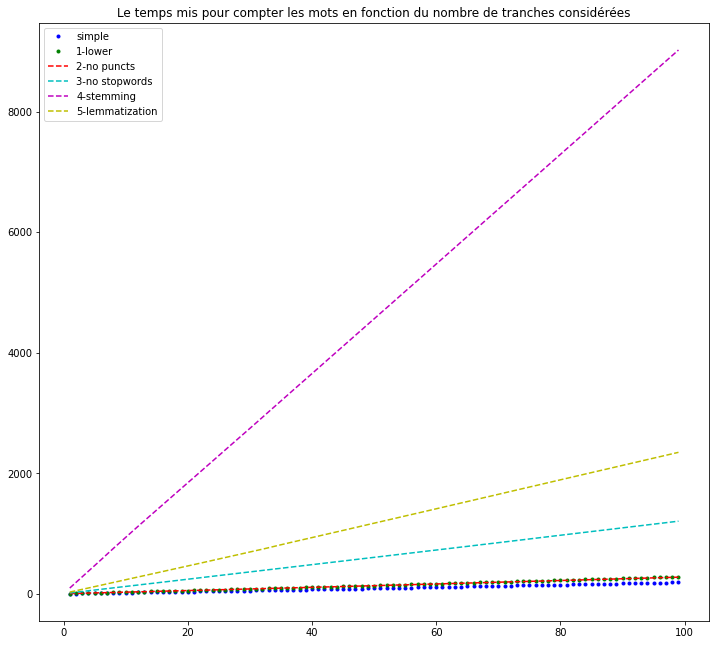

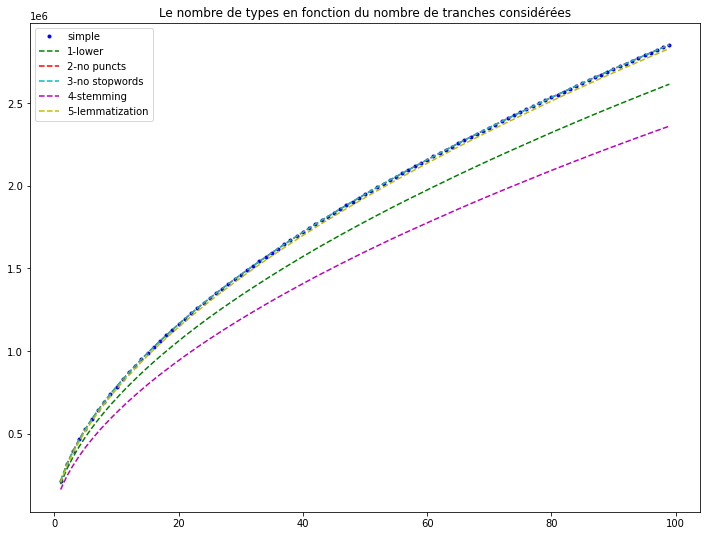

In [49]:
tranches = list(range(1,100))
plt.figure(figsize=(12,11))
plt.plot(tranches, times,'b.', label='simple')
plt.plot(tranches, times_1,'g.', label='1-lower')
plt.plot(tranches, times_2,'r--', label='2-no puncts')
plt.plot(tranches, times_3,'c--', label='3-no stopwords')
plt.plot(tranches, times_4,'m--', label='4-stemming')
plt.plot(tranches, times_5,'y--', label='5-lemmatization')
plt.title("Le temps mis pour compter les mots en fonction du nombre de tranches considérées")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(12,9))
plt.plot(tranches, types , 'b.', label='simple')
plt.plot(tranches, types_1 , 'g--', label='1-lower')
plt.plot(tranches, types_2 , 'r--', label='2-no puncts')
plt.plot(tranches, types_3 , 'c--', label='3-no stopwords')
plt.plot(tranches, types_4 , 'm--', label='4-stemming')
plt.plot(tranches, types_5 , 'y--', label='5-lemmatization')
plt.title("Le nombre de types en fonction du nombre de tranches considérées")
plt.legend(loc="upper left")

plt.show()

|# |character|	color|
|---|---|---|
|1  |  ‘b’|blue|
|2  |  ‘g’|	green| 
|3  |  ‘r’|	red|
|4  |  ‘c’|	cyan|
|5  |  ‘m’|	magenta|
|6  |  ‘y’|	yellow|
|7  |  ‘k’|	black|
|8  |  ‘w’|	white|

### Notes
Using clean() function slows down the execution 